In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
data2001 = pd.read_csv('./pems03/d03_text_station_5min_2018_02_28.txt.gz',header=None, usecols=range(12))
# Assign column names based on the provided headers
column_names = [
    "Timestamp", "Station", "District", "Freeway #", 
    "Direction of Travel", "Lane Type", "Station Length", 
    "Samples", "% Observed", "Total Flow", "Avg Occupancy", "Avg Speed"
]

# Assign column names to the dataframe
data2001.columns = column_names
data2001

In [ ]:
comm = np.load('pems03_comm.npy')
comm

In [ ]:
import pandas as pd
import calendar
from datetime import date, timedelta

def read_and_process_data(file_path):
    # Read the CSV file, specifying the usecols parameter to only load the columns of interest
    data = pd.read_csv(
        file_path, 
        header=None, 
        usecols=[0, 1, 9],  # Column indexes for Timestamp, Station, and Total Flow
        names=['Timestamp', 'Station', 'Avg Flow'],  # Assigning column names
        compression='gzip'
    )

    # Convert the Timestamp column to datetime format and set it as the index
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)

    # Pivot the table to get Stations as columns and Total Flow as cell values
    pivot_data = data.pivot(columns='Station', values='Avg Flow')

    return pivot_data

# Read the data for February 28 to get the column names (Station IDs)
# feb_28_data = read_and_process_data('./pems03/d03_text_station_5min_2018_02_28.txt.gz')
# feb_28_columns = feb_28_data.columns

# Initialize a list to hold the data for all days
all_data = []

start_date = date(2001, 3, 4)  # 开始日期
end_date = date(2024, 3, 20)   # 结束日期
current_date = start_date
all_data = []                  # 存储所有数据的列表

while current_date <= end_date:
    year = current_date.year
    month = current_date.month
    day = current_date.day
    file_path = f'./pems03/d03_text_station_5min_{year}_{month:02d}_{day:02d}.txt.gz'
    
    # 检查文件是否存在
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}, skipping...")
        current_date += timedelta(days=1)
        continue
    
    day_data = read_and_process_data(file_path)
    
    # 使用字典存储新列，以便一次性添加到数据帧
    new_columns = {}
    for col in comm:
        if col not in day_data:
            new_columns[col] = 0  # 假设使用0填充缺失的列

    # 使用 pd.concat 添加所有新列
    if new_columns:
        new_data = pd.DataFrame(new_columns, index=day_data.index)
        day_data = pd.concat([day_data, new_data], axis=1)

    # 将列重新排序以匹配2月28日的顺序
    day_data = day_data[comm]
    
    all_data.append(day_data)
    
    current_date += timedelta(days=1)

# Concatenate all daily data into a single DataFrame
combined_data = pd.concat(all_data)

# Fill any remaining missing values with 0
combined_data.fillna(0, inplace=True)

# The combined_data DataFrame now holds the merged data for January 1 to February 28
# with columns aligned to February 28 and missing values filled with 0
# Note: The code execution is commented out to prevent execution in this environment.
# combined_data.head()
combined_data.to_csv('pems03_all_common_flow.csv')

In [ ]:
combined_data

In [4]:
pems03 = pd.read_csv('pems03_all_common_flow.csv')

In [5]:
pems03

,date,311831,311832,311844,311847,311864,311903,311930,311973,311974,...,313166,313172,313178,313184,313190,313197,313204,313339,313344,313349
0,2002-06-01 00:00:00,0.0,0.0,2.0,2.0,0.0,148.0,0.0,0.0,156.0,...,77.0,179.0,141.0,108.0,80.0,119.0,105.0,17.0,30.0,35.0
1,2002-06-01 00:05:00,3.0,5.0,2.0,7.0,0.0,183.0,0.0,0.0,184.0,...,60.0,131.0,143.0,120.0,66.0,114.0,112.0,24.0,30.0,34.0
2,2002-06-01 00:10:00,2.0,7.0,1.0,9.0,0.0,180.0,0.0,0.0,180.0,...,65.0,144.0,106.0,131.0,70.0,103.0,97.0,32.0,43.0,46.0
3,2002-06-01 00:15:00,1.0,5.0,1.0,1.0,0.0,153.0,0.0,0.0,151.0,...,72.0,184.0,161.0,125.0,75.0,94.0,88.0,31.0,33.0,39.0
4,2002-06-01 00:20:00,1.0,10.0,4.0,10.0,0.0,149.0,0.0,0.0,149.0,...,73.0,166.0,120.0,95.0,79.0,128.0,128.0,21.0,32.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291977,2024-03-20 23:35:00,6.0,7.0,8.0,0.0,0.0,172.0,0.0,0.0,458.0,...,42.0,49.0,15.0,102.0,46.0,70.0,78.0,22.0,23.0,23.0
2291978,2024-03-20 23:40:00,5.0,12.0,7.0,0.0,0.0,190.0,0.0,0.0,504.0,...,54.0,65.0,40.0,80.0,51.0,85.0,95.0,22.0,30.0,29.0
2291979,2024-03-20 23:45:00,4.0,7.0,5.0,0.0,0.0,157.0,1.0,0.0,413.0,...,42.0,48.0,30.0,77.0,42.0,70.0,76.0,40.0,35.0,34.0
2291980,2024-03-20 23:50:00,2.0,11.0,7.0,0.0,0.0,134.0,1.0,0.0,360.0,...,39.0,48.0,0.0,74.0,51.0,85.0,90.0,18.0,18.0,21.0


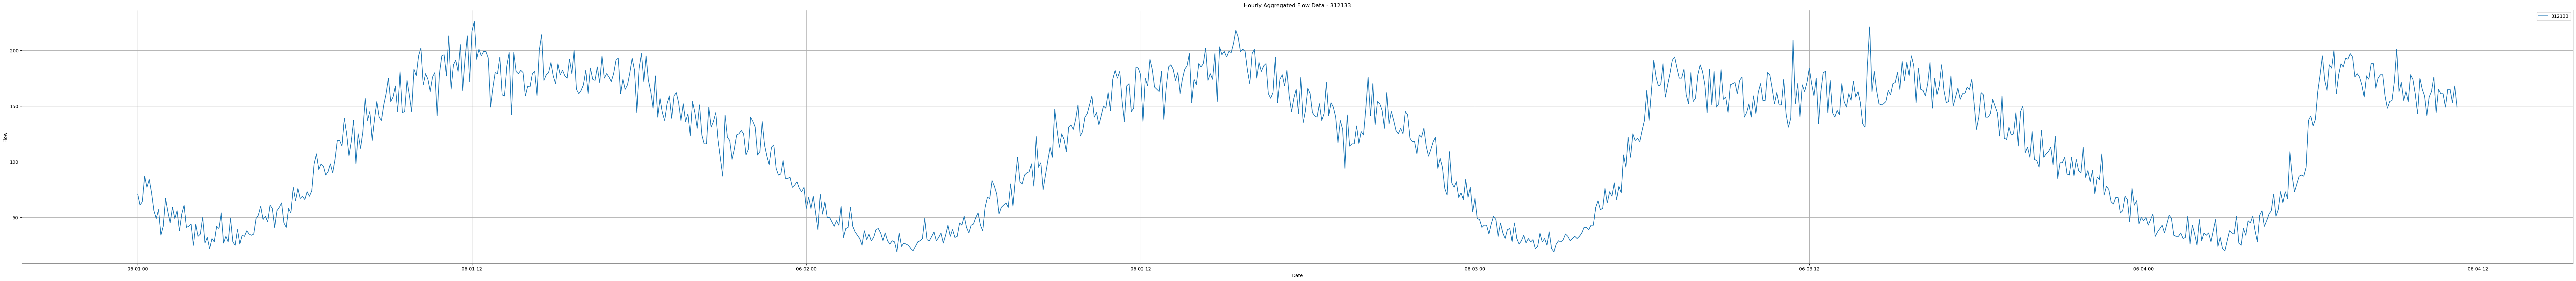

In [20]:
selected_column = pems03.columns[19]  # Select the first column
subset_df = pems03.head(1000)
plt.figure(figsize=(100, 10))
plt.plot(subset_df.index, subset_df[selected_column], label=selected_column)
plt.xlabel('Date')
plt.ylabel('Flow')
plt.title(f'Hourly Aggregated Flow Data - {selected_column}')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Convert the 'date' column to datetime
pems03['date'] = pd.to_datetime(pems03['date'])

# Set the 'date' column as the index
pems03.set_index('date', inplace=True)

# Resample to hourly data and aggregate using sum
pems03_hourly = pems03.resample('H').sum()

# Reset the index if you want the 'date' column back
pems03_hourly.reset_index(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_29600\4103566718.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pems03_hourly = pems03.resample('H').sum()


In [18]:
pems03_hourly.to_csv('pems03_h.csv',index=False)

In [19]:
pems03_hourly = pd.read_csv('pems03_h.csv')
pems03_hourly

,date,311831,311832,311844,311847,311864,311903,311930,311973,311974,...,313166,313172,313178,313184,313190,313197,313204,313339,313344,313349
0,2002-06-01 00:00:00,13.0,57.0,21.0,63.0,0.0,1744.0,0.0,0.0,1651.0,...,736.0,1734.0,1401.0,1161.0,822.0,1069.0,1010.0,266.0,373.0,445.0
1,2002-06-01 01:00:00,4.0,29.0,49.0,33.0,0.0,1449.0,0.0,0.0,1086.0,...,641.0,1466.0,781.0,818.0,800.0,679.0,628.0,200.0,285.0,347.0
2,2002-06-01 02:00:00,8.0,21.0,6.0,27.0,0.0,1273.0,0.0,0.0,842.0,...,449.0,1167.0,679.0,613.0,699.0,498.0,451.0,174.0,274.0,329.0
3,2002-06-01 03:00:00,7.0,12.0,4.0,18.0,0.0,1116.0,0.0,0.0,645.0,...,281.0,888.0,666.0,364.0,623.0,392.0,365.0,153.0,249.0,289.0
4,2002-06-01 04:00:00,7.0,7.0,9.0,45.0,0.0,1184.0,0.0,0.0,699.0,...,331.0,994.0,762.0,298.0,653.0,470.0,437.0,240.0,339.0,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191131,2024-03-20 19:00:00,110.0,334.0,471.0,0.0,0.0,2916.0,2956.0,0.0,6489.0,...,1639.0,2122.0,1337.0,3251.0,1783.0,3397.0,2537.0,1618.0,1365.0,1350.0
191132,2024-03-20 20:00:00,88.0,314.0,385.0,0.0,0.0,2580.0,2369.0,0.0,6078.0,...,1444.0,1836.0,1156.0,2608.0,1499.0,2690.0,1957.0,1229.0,1066.0,1076.0
191133,2024-03-20 21:00:00,70.0,255.0,315.0,0.0,0.0,1958.0,1983.0,0.0,5338.0,...,1172.0,1441.0,964.0,2139.0,1142.0,2311.0,1666.0,940.0,841.0,841.0
191134,2024-03-20 22:00:00,57.0,171.0,177.0,0.0,0.0,1456.0,1469.0,0.0,4382.0,...,914.0,1081.0,684.0,1540.0,918.0,1519.0,1328.0,639.0,556.0,545.0


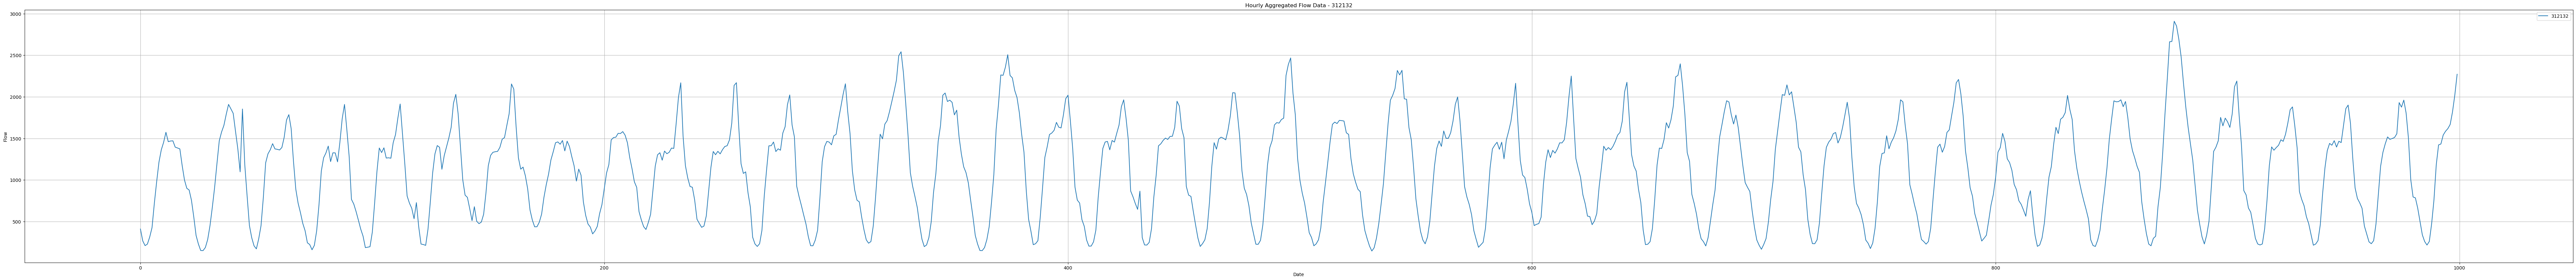

In [21]:
selected_column = pems03_hourly.columns[19]  # Select the first column
subset_df = pems03_hourly.head(1000)
plt.figure(figsize=(100, 10))
plt.plot(subset_df.index, subset_df[selected_column], label=selected_column)
plt.xlabel('Date')
plt.ylabel('Flow')
plt.title(f'Hourly Aggregated Flow Data - {selected_column}')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Convert the 'date' column to datetime
pems03 = pd.read_csv('pems03_all_common_flow.csv')
pems03['date'] = pd.to_datetime(pems03['date'])

# Set the 'date' column as the index
pems03.set_index('date', inplace=True)

# Resample to hourly data and aggregate using sum
pems03_daily = pems03.resample('D').sum()

# Reset the index if you want the 'date' column back
pems03_daily.reset_index(inplace=True)
pems03_daily.to_csv('pems03_d.csv',index=False)

In [26]:
pems03_daily

,date,311831,311832,311844,311847,311864,311903,311930,311973,311974,...,313166,313172,313178,313184,313190,313197,313204,313339,313344,313349
0,2002-06-01,1206.0,3347.0,1863.0,4883.0,0.0,71609.0,0.0,0.0,83515.0,...,39042.0,72481.0,59485.0,55676.0,31009.0,67103.0,63659.0,30823.0,29336.0,30139.0
1,2002-06-02,1213.0,2806.0,1562.0,4019.0,0.0,52000.0,0.0,0.0,69575.0,...,32407.0,62667.0,54947.0,43571.0,27305.0,54543.0,51639.0,29718.0,27610.0,28417.0
2,2002-06-03,1227.0,4922.0,3814.0,6093.0,0.0,69050.0,0.0,0.0,94769.0,...,38778.0,75641.0,59497.0,62702.0,31691.0,79489.0,74612.0,37846.0,31511.0,30980.0
3,2002-06-04,1234.0,4989.0,3812.0,6234.0,0.0,70494.0,0.0,0.0,96524.0,...,39249.0,47243.0,60293.0,63346.0,23357.0,82150.0,77140.0,38430.0,31940.0,31059.0
4,2002-06-05,1429.0,4816.0,3782.0,6324.0,0.0,73557.0,0.0,0.0,98242.0,...,39734.0,48126.0,61393.0,65995.0,40232.0,82922.0,77577.0,37726.0,31051.0,30471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,2024-03-16,2246.0,5838.0,11355.0,7545.0,0.0,58966.0,65245.0,0.0,135042.0,...,37542.0,46634.0,27172.0,61486.0,41007.0,75413.0,59969.0,33120.0,29812.0,29152.0
7960,2024-03-17,2214.0,5356.0,9795.0,5913.0,0.0,53719.0,58763.0,0.0,126254.0,...,33932.0,41484.0,23720.0,51483.0,36267.0,66598.0,51836.0,29472.0,27026.0,26544.0
7961,2024-03-18,2719.0,5757.0,11062.0,1017.0,0.0,55654.0,64672.0,0.0,127955.0,...,39496.0,48585.0,27442.0,62751.0,42242.0,77029.0,62256.0,38464.0,34490.0,33926.0
7962,2024-03-19,3030.0,5736.0,11420.0,0.0,0.0,56272.0,64688.0,0.0,125490.0,...,40208.0,49714.0,28190.0,63952.0,43103.0,78280.0,63935.0,39827.0,35578.0,34745.0


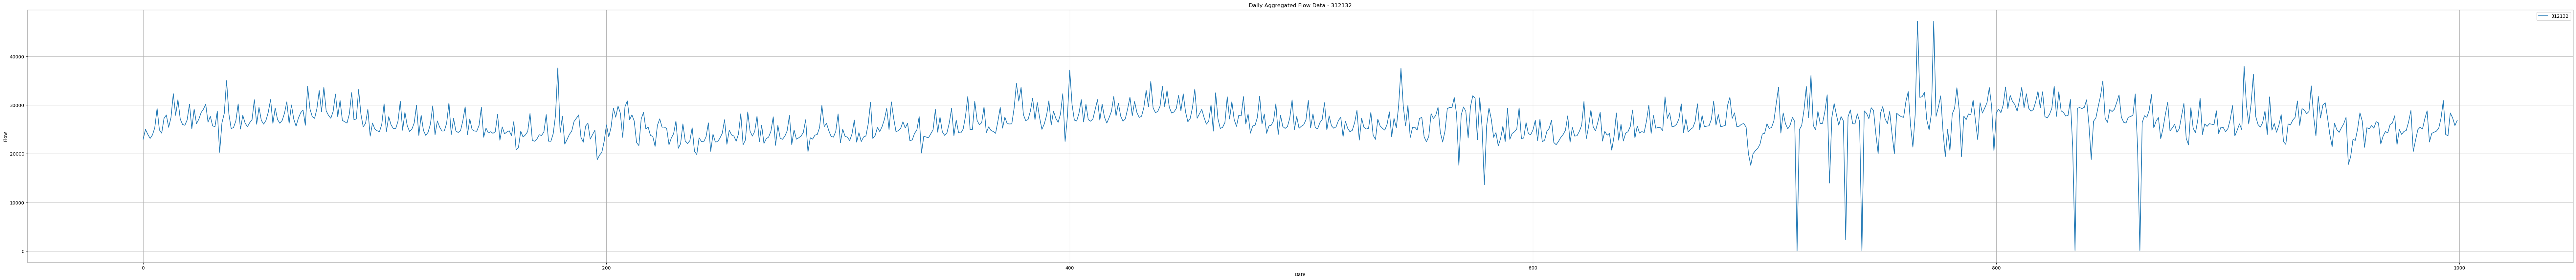

In [25]:
selected_column = pems03_hourly.columns[19]  # Select the first column
subset_df = pems03_daily.head(1000)
plt.figure(figsize=(100, 10))
plt.plot(subset_df.index, subset_df[selected_column], label=selected_column)
plt.xlabel('Date')
plt.ylabel('Flow')
plt.title(f'Daily Aggregated Flow Data - {selected_column}')
plt.legend()
plt.grid(True)
plt.show()